# EcoFOCIpy ADCP QC - 19CKP-2A

- mostly remove >100 cm/s flows in u/v


In [1]:
import xarray as xa
import numpy as np

import matplotlib.pyplot as plt


In [2]:
xdf = xa.load_dataset('19ckp2a_0035m.nc')

In [3]:
xdf =xdf.where(xdf.u_curr_comp <=100,np.nan)
xdf

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, time: 18758, depth: 24)
Coordinates:
  * time             (time) datetime64[ns] 2019-08-18T22:00:46 ... 2020-09-12...
  * depth            (depth) float64 -14.0 -12.0 -10.0 -8.0 ... 28.0 30.0 32.0
  * latitude         (latitude) float64 71.22
  * longitude        (longitude) float64 -164.3
Data variables:
    u_curr_comp      (latitude, longitude, time, depth) float64 nan ... -1.034
    v_curr_comp      (latitude, longitude, time, depth) float64 nan ... 4.033
    w_curr_comp      (latitude, longitude, time, depth) float64 nan nan ... -8.5
    w_curr_comp_err  (latitude, longitude, time, depth) float64 nan nan ... 0.2
    agc1             (latitude, longitude, time, depth) float64 nan ... 117.0
    agc2             (latitude, longitude, time, depth) float64 nan ... 125.0
    agc3             (latitude, longitude, time, depth) float64 nan ... 126.0
    agc4             (latitude, longitude, time, depth) float64 nan ... 117.0
Attributes: (12/31)
    Latitude_DegMMddW:                      71 13.203 N
    Longitude_DegMMddN:                     164 15.088 W
    MooringID:                              19CKP-2A
    platform_deployment_date:               2019-08-18T21:36:53Z
    platform_deployment_cruise_name:        OS1901
    platform_recovery_date:                 2020-09-13T00:00:00Z
    ...                                     ...
    citation:                               
    acknowledgement:                        
    date_created:                           2022-03-01T15:36:38Z
    date_modified:                          
    QC_indicator:                           unknown
    history:                                Trimmed to deployment.

In [4]:
# xdf['history'] = xdf.history + 'QC of high u/v values'

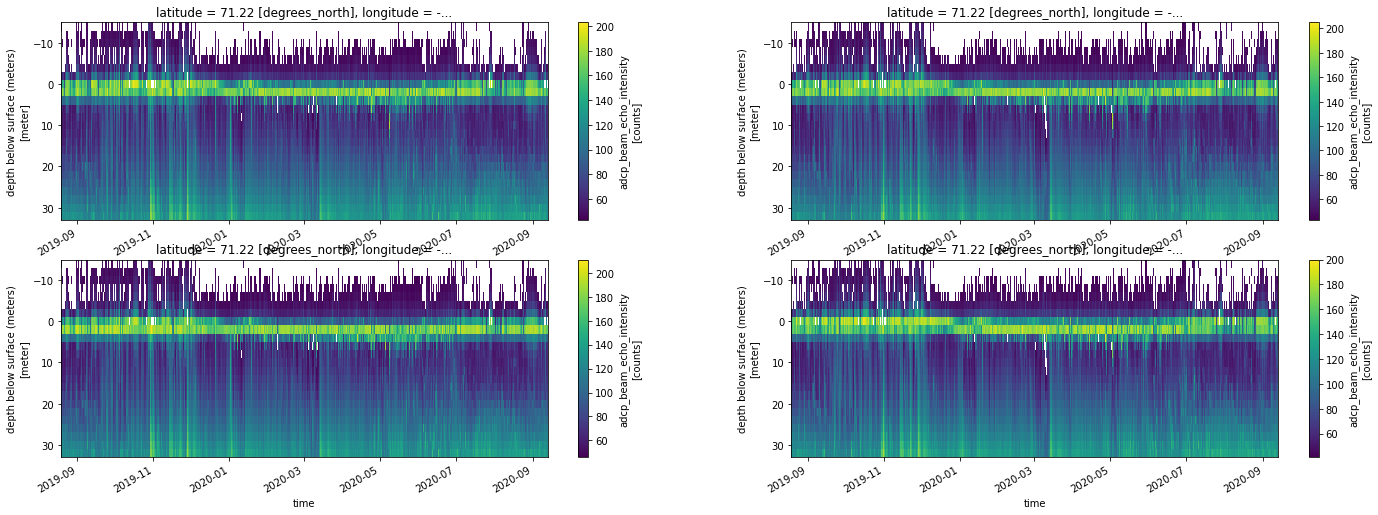

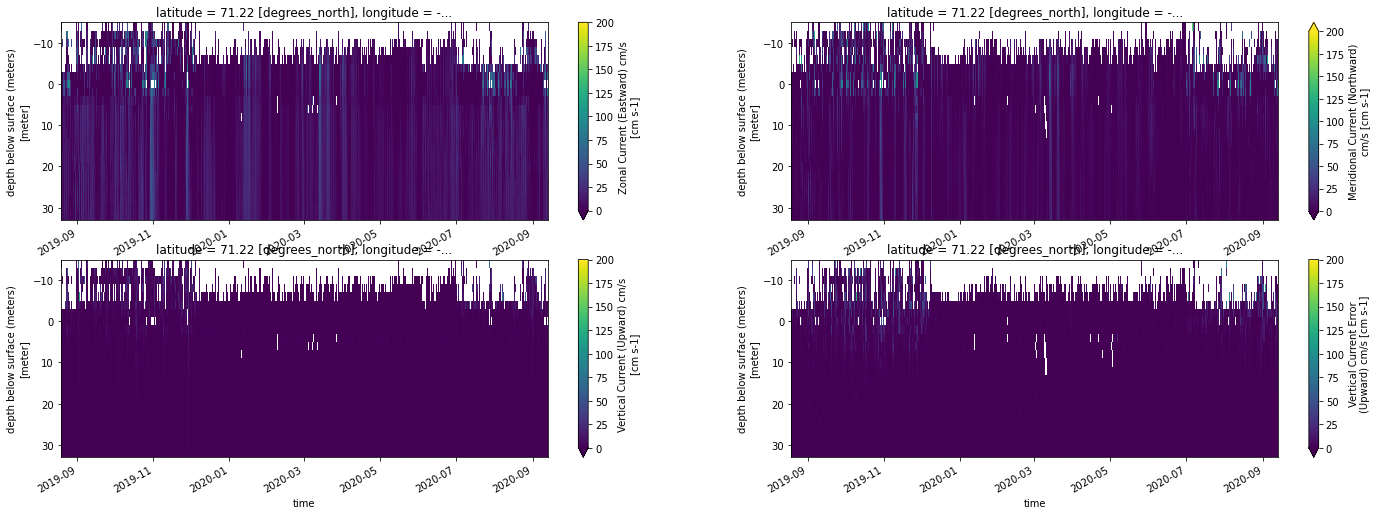

In [5]:
#optional plotting

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    xdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    xdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    xdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    xdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    xdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    xdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [6]:
xdf.attrs['history'] = xdf.attrs['history']+'  removed U,V >100cm/s'

In [7]:
ixdf = xdf.interpolate_na(dim='time',max_gap='2H')

In [8]:
#trim 0m and above
ixdf=ixdf.sel(depth=slice(3, 40))

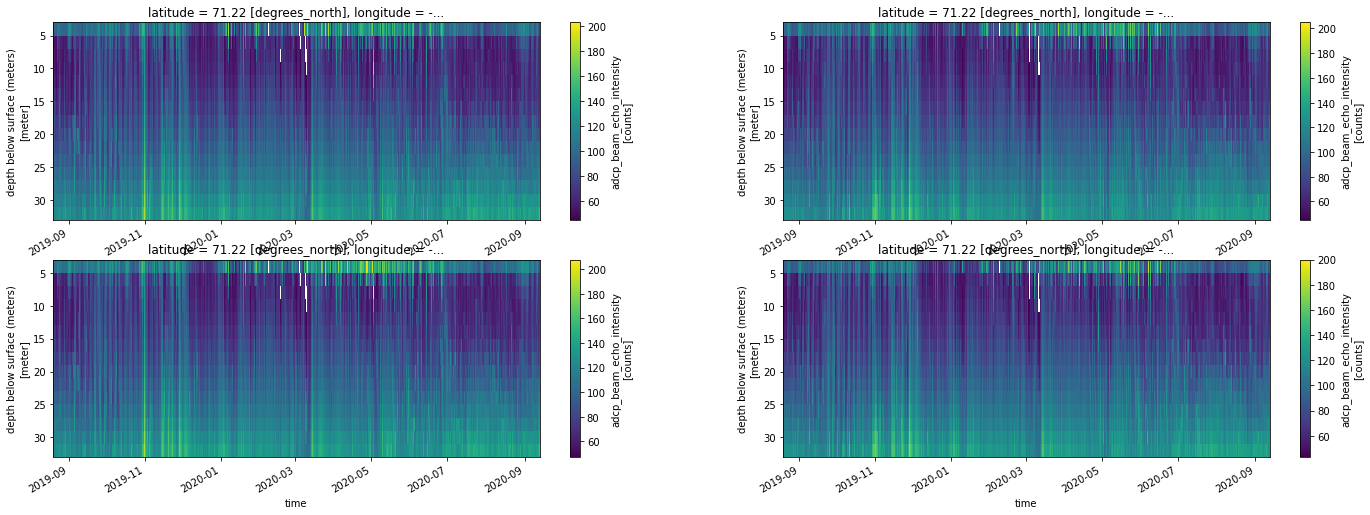

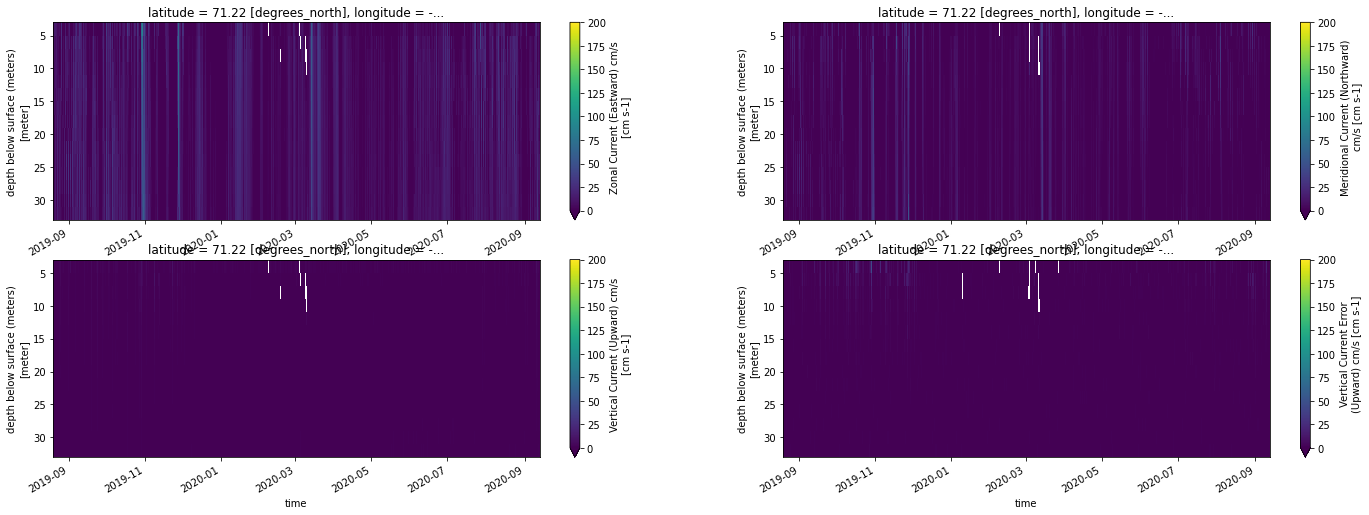

In [9]:

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['agc1'].T.plot(ax=axes[0,0], yincrease=False)
    ixdf['agc2'].T.plot(ax=axes[0,1], yincrease=False)
    ixdf['agc3'].T.plot(ax=axes[1,0], yincrease=False)
    ixdf['agc4'].T.plot(ax=axes[1,1], yincrease=False)
except:
    pass

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24,8))
try:
    ixdf['u_curr_comp'].T.plot(ax=axes[0,0],vmin=0, vmax=200, yincrease=False)
    ixdf['v_curr_comp'].T.plot(ax=axes[0,1],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp'].T.plot(ax=axes[1,0],vmin=0, vmax=200, yincrease=False)
    ixdf['w_curr_comp_err'].T.plot(ax=axes[1,1],vmin=0, vmax=200, yincrease=False)
except:
    pass

In [10]:
ixdf.to_netcdf('19ckp2a_velein_0035m.filtered.nc')